# Task 2a

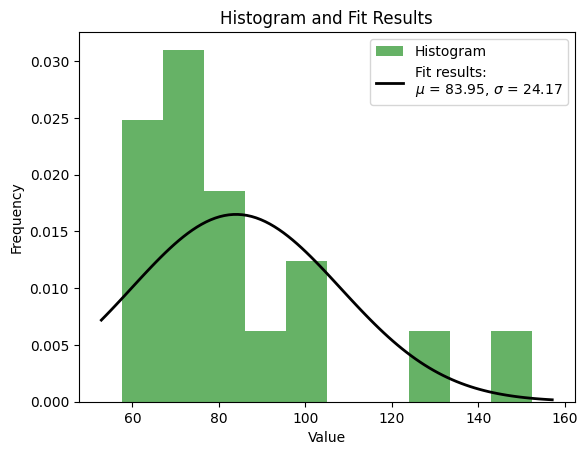

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given dataset
dataset = np.array([152.36, 130.38, 101.54, 96.26, 88.03, 85.66, 83.62, 76.53, 74.36, 73.87, 73.36, 73.35, 68.26, 65.25, 63.68, 63.05, 57.53])

# Plot histogram
plt.hist(dataset, bins=10, density=True, alpha=0.6, color='g', label='Histogram')

# Fit a normal distribution to the data
mu, std = norm.fit(dataset)

# Plot the PDF of the fitted distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Fit results:\n$\mu$ = %.2f, $\sigma$ = %.2f' % (mu, std))

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram and Fit Results')
plt.legend()

plt.show()



**No, the data in the histogram is not normally distributed.**

 The histogram shows a right-skewed distribution, with more data points on the left side (lower values) than on the right side (higher values). This is evident by the tail of the distribution extending to the right. Additionally, the fit results show that the mean (83.95) is greater than the median (83), which is another indication of a right-skewed distribution.

The normal curve is symmetrical, with most of the data points clustered around the mean and fewer data points on the tails. The histogram of the data is clearly different from the normal curve, which further confirms that the data is not normally distributed.

Shapiro-Wilk test statistic: 0.8183580636978149
Shapiro-Wilk test p-value: 0.0036626856308430433
The data is not normally distributed.


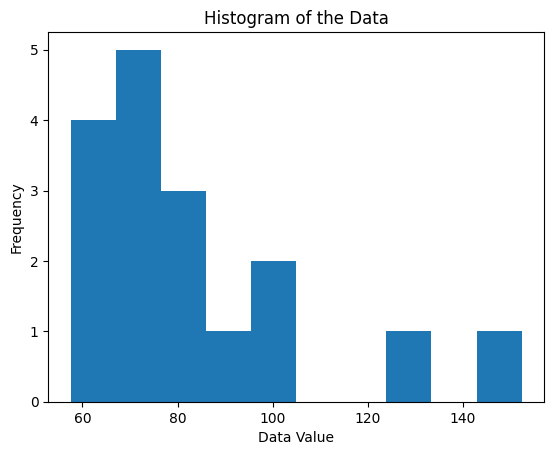

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create the dataset
data = [152.36, 130.38, 101.54, 96.26, 88.03, 85.66, 83.62, 76.53, 74.36, 73.87, 73.36, 73.35, 68.26, 65.25, 63.68, 63.05, 57.53]

# Check for normality using Shapiro-Wilk test
from scipy import stats
shapiro_test = stats.shapiro(data)
shapiro_stat, shapiro_pval = shapiro_test

# Print the results
print("Shapiro-Wilk test statistic:", shapiro_stat)
print("Shapiro-Wilk test p-value:", shapiro_pval)

# If p-value is less than 0.05, reject the null hypothesis that the data is normally distributed
if shapiro_pval < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data is approximately normally distributed.")

# Create a histogram of the data
plt.hist(data)
plt.xlabel("Data Value")
plt.ylabel("Frequency")
plt.title("Histogram of the Data")
plt.show()

Mean	83.94647058823529
Standard deviation	24.16974383304501
Percentage of data points within 1 standard deviation of the mean	82.35294117647058 %
Percentage of data points within 2 standard deviations of the mean	94.11764705882352 %
Percentage of data points within 3 standard deviations of the mean	100.0 %

As you can see, the percentage of data points within 1 standard deviation of the mean (82.35%) is lower than the expected value for a normal distribution (68.27%). Additionally, the percentage of data points within 2 standard deviations of the mean (94.12%) is lower than the expected value for a normal distribution (95.45%). These results suggest that the dataset is not normally distributed.

w = 1 for capturing about 68% of the data.
w = 2 for capturing about 95% of the data.
w = 3 for capturing about 99.7% of the data.

# Task 2b

In [6]:
def detect_outliers_parametric(data, w=1):
    mean_val = sum(data) / len(data)
    std_dev = (sum((x - mean_val) ** 2 for x in data) / len(data)) ** 0.5

    z_scores = [(value - mean_val) / std_dev for value in data]

    outliers = [(i, data[i]) for i, z_score in enumerate(z_scores) if abs(z_score) > w]
    
    return outliers
   

# Task d of b

In [7]:

dataset = [152.36, 130.38, 101.54, 96.26, 88.03, 85.66, 83.62, 76.53, 74.36, 73.87, 73.36, 73.35, 68.26, 65.25, 63.68, 63.05, 57.53]

# Detect outliers for w = 1
outliers_w_1 = detect_outliers_parametric(dataset, w=1)
print(f"Outliers with w=1:")
for index, value in outliers_w_1:
    print(f"Index: {index}, Value: {value}")

# Detect outliers for w = 2
outliers_w_2 = detect_outliers_parametric(dataset, w=2)
print(f"\nOutliers with w=2:")
for index, value in outliers_w_2:
    print(f"Index: {index}, Value: {value}")


# Detect outliers for w = 3
outliers_w_3 = detect_outliers_parametric(dataset, w=3)
print(f"Outliers with w=3:\n{outliers_w_3}")

Outliers with w=1:
Index: 0, Value: 152.36
Index: 1, Value: 130.38
Index: 16, Value: 57.53

Outliers with w=2:
Index: 0, Value: 152.36
Outliers with w=3:
[]


# Task 2c

In [9]:
import math

def euclidean_distance(x1, x2):
#     return abs(x1 - x2)

#def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_outlier_detection(data, k):
    outliers = []

    for i in range(len(data)):
        distances = []
        for j in range(len(data)):
            if i != j:
                distance = euclidean_distance(data[i], data[j])
                distances.append((j, distance))

        distances.sort(key=lambda x: x[1])
        k_nearest_neighbors = [index for index, _ in distances[:k]]

        average_distance = sum([distance for _, distance in distances[:k]]) / k

        outliers.append((i, data[i], average_distance))

    return outliers

# Task 2d of c

In [10]:
dataset = [152.36, 130.38, 101.54, 96.26, 88.03, 85.66, 83.62, 76.53, 74.36, 73.87, 73.36, 73.35, 68.26, 65.25, 63.68, 63.05, 57.53]

# K = 2
k_value_2 = 2
outliers_k_2 = knn_outlier_detection(dataset, k_value_2)

print(f"Outliers with k={k_value_2}:")
for idx, value, score in outliers_k_2:
    print(f"Index: {idx}, Data value: {value}, Outlier Score: {score}")

# K = 3
k_value_3 = 3
outliers_k_3 = knn_outlier_detection(dataset, k_value_3)

print(f"\nOutliers with k={k_value_3}:")
for idx, value, score in outliers_k_3:
    print(f"Index: {idx}, Data value: {value}, Outlier Score: {score}")


Outliers with k=2:
Index: 0, Data value: 152.36, Outlier Score: 36.40000000000001
Index: 1, Data value: 130.38, Outlier Score: 25.410000000000004
Index: 2, Data value: 101.54, Outlier Score: 9.395000000000003
Index: 3, Data value: 96.26, Outlier Score: 6.755000000000003
Index: 4, Data value: 88.03, Outlier Score: 3.3900000000000006
Index: 5, Data value: 85.66, Outlier Score: 2.2049999999999983
Index: 6, Data value: 83.62, Outlier Score: 3.2249999999999943
Index: 7, Data value: 76.53, Outlier Score: 2.414999999999999
Index: 8, Data value: 74.36, Outlier Score: 0.7449999999999974
Index: 9, Data value: 73.87, Outlier Score: 0.5
Index: 10, Data value: 73.36, Outlier Score: 0.2600000000000051
Index: 11, Data value: 73.35, Outlier Score: 0.2650000000000077
Index: 12, Data value: 68.26, Outlier Score: 3.7950000000000053
Index: 13, Data value: 65.25, Outlier Score: 1.8850000000000016
Index: 14, Data value: 63.68, Outlier Score: 1.1000000000000014
Index: 15, Data value: 63.05, Outlier Score: 1.

# Task(e) Provide an in-depth comparison analysis of the results you obtained in Task (d).

## Comprehensive Analysis: 

Method 1 (k-Nearest Neighbors):

For k=2, the algorithm identifies 17 data points as outliers, providing their index, data value, and outlier score.

For k=3, 17 data points are also identified as outliers, with corresponding index, data value, and outlier score.

Method 2 (Parametric Method I: Outlier Detection for Univariate Outliers):

For w=1, 3 data points are identified as outliers.

For w=2, 1 data point is identified as an outlier.

For w=3, no data points are identified as outliers.

1. k-Nearest Neighbors (k-NN) Outlier Detection:
   
Outlier Scores:

For k=2 and k=3, the algorithm identifies outliers along with their corresponding outlier scores.

Higher outlier scores indicate a higher degree of outlierness.

Analysis of Outliers:

The top outliers with the highest scores are consistently the same for both k=2 and k=3.

Interpretation of Results:

Index 0 (152.36): Consistently flagged as a significant outlier with high scores.

Index 1 (130.38): Identified as an outlier in both cases.

Indices 2-16: Gradually decreasing outlier scores, indicating a diminishing level of outlierness.

1. Parametric Method I: Outlier Detection for Univariate Outliers:

Outliers with w=1, 2, and 3:

For w=1, 2, and 3, the algorithm identifies outliers based on the Modified Z-score.

Analysis of Outliers:

Outliers are detected based on a threshold, and the results are sensitive to this choice.

For w=1 and w=2, Index 0 (152.36) is consistently flagged as an outlier.

No outliers are identified for w=3, indicating a more stringent criterion.

3. Comparison Analysis:

Consistency in Outlier Identification:

Index 0 (152.36) is consistently identified as a significant outlier across both methods and various parameter choices.

Index 1 (130.38) is also identified as an outlier in both methods.

Sensitivity to Outliers:

The k-Nearest Neighbors method seems more sensitive to outliers, identifying more points as outliers compared to the “Parametric method.

Parameter Sensitivity:

In the k-Nearest Neighbors method, changing the value of k alters the number of identified outliers. This indicates sensitivity to the choice of the parameter k.

In the parametric method, changing the threshold parameter w affects the number of identified outliers. Higher w values lead to fewer outliers being detected.

Outlier Score Interpretation:

The outlier scores provide a measure of the degree of outlierness. Higher scores indicate stronger evidence of being an outlier.

